In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [ ]:
# Load dataset (Update file path as needed)
data = pd.read_csv("/content/train_datetime.csv")  # Replace with actual file name

# Display basic info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Date                          84960 non-null  object 
 2   dayOfYear                     84960 non-null  int64  
 3   weekday                       84960 non-null  int64  
 4   month_sin                     84960 non-null  float64
 5   month_cos                     84960 non-null  float64
 6   day_sin                       84960 non-null  float64
 7   day_cos                       84960 non-null  float64
 8   Year                          84960 non-null  int64  
 9   Month                         84960 non-null  int64  
 10  Day                           84960 non-null  int64  
 11  kingdom                       84960 non-null  object 
 12  latitude                      84960 non-null  float64
 13  l

In [ ]:
# Calculate missing values column-wise
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
missing_values


Missing Values per Column:


,0
ID,0
Date,0
dayOfYear,0
weekday,0
month_sin,0
month_cos,0
day_sin,0
day_cos,0
Year,0
Month,0


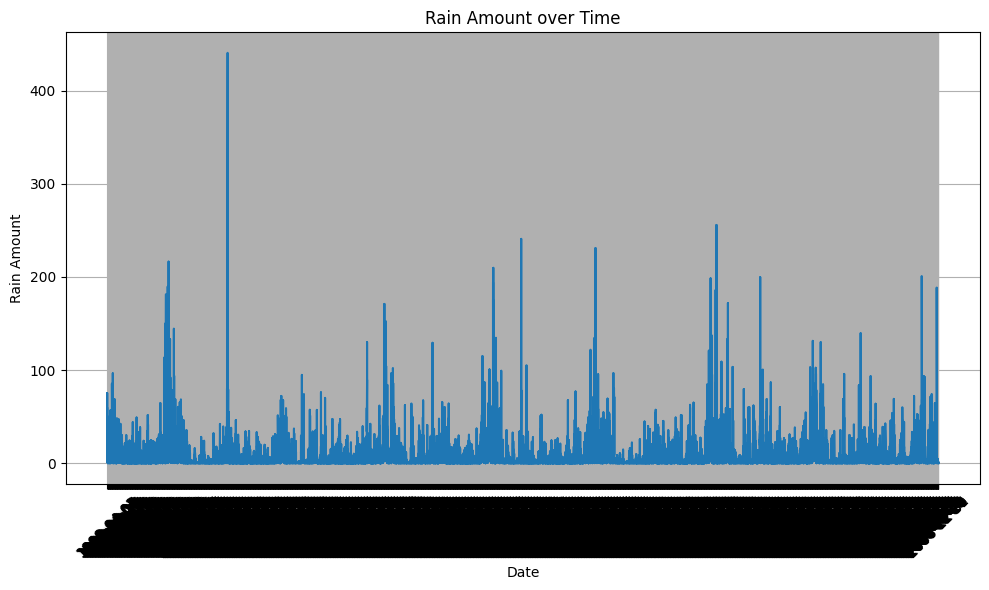

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Rain_Amount'])
plt.xlabel('Date')
plt.ylabel('Rain Amount')
plt.title('Rain Amount over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Remove rows where the date is 2000-05-15 or 2000-05-16
data = data[~data['Date'].isin(['2000-05-15', '2000-05-16'])]

In [ ]:
# Find unique values in the 'kingdom' column
kingdom_options = data['kingdom'].unique()

# Print the available kingdom options
print("Available Kingdom Options:")
kingdom_options

Available Kingdom Options:


array(['Arcadia', 'Atlantis', 'Avalon', 'Camelot', 'Dorne', 'Eden',
       'El Dorado', 'Elysium', 'Emerald City', 'Helios', 'Krypton',
       'Metropolis', 'Midgar', 'Midgard', 'Mordor', 'Neo-City',
       'Neo-Tokyo', 'Nirvana', 'Olympus', 'Pandora', 'Rapture',
       'Rivendell', 'Serenity', 'Shangri-La', 'Solara', 'Solstice',
       'Sunspear', 'Utopia', 'Valyria', 'Winterfell'], dtype=object)

In [ ]:
kingdom_list = list(kingdom_options)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/sk1xdbb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/x9paxkb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10962', 'data', 'file=/tmp/tmpk3w1z7yt/sk1xdbb8.json', 'init=/tmp/tmpk3w1z7yt/x9paxkb9.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelx49578i1/prophet_model-20250403061857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


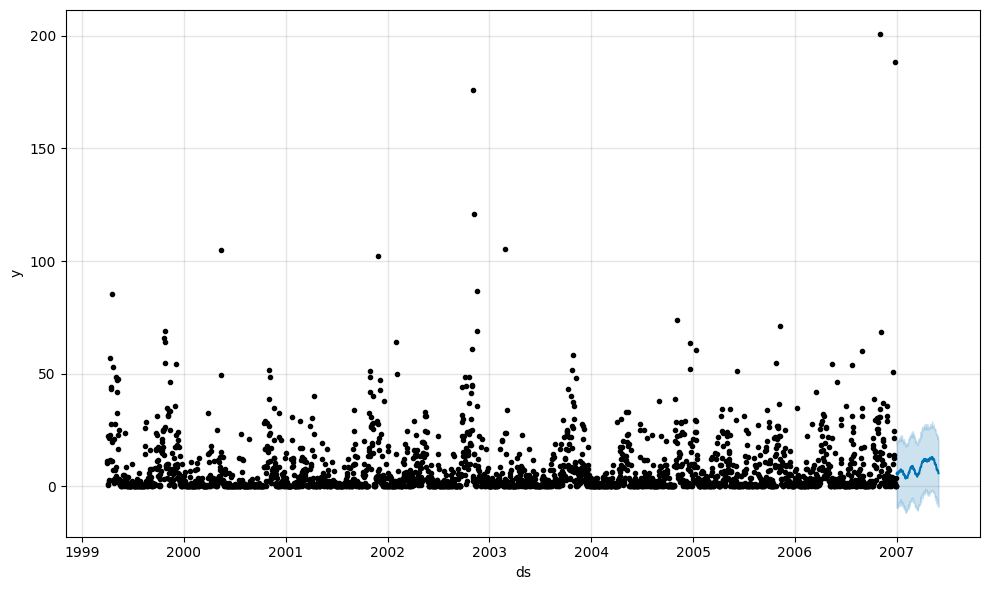

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
<ipython-input-20-af0cbcbd470f>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_predictions = pd.concat([final_predictions, kingdom_forecast])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/kx_yobjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/u65u2fso.json
DEBUG:cmd

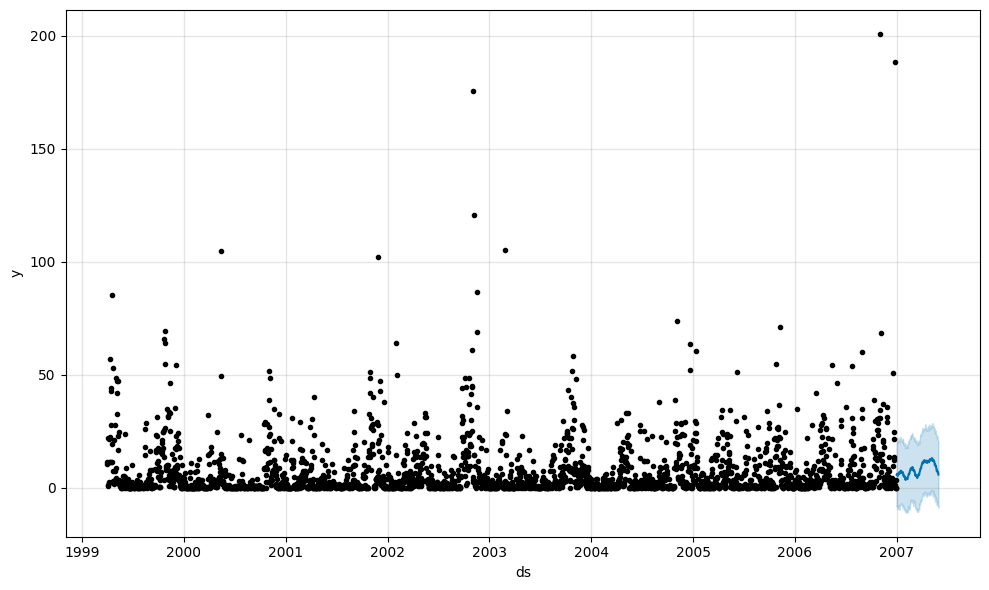

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/91e84of3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/6_ujyo0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4330', 'data', 'file=/tmp/tmpk3w1z7yt/91e84of3.json', 'init=/tmp/tmpk3w1z7yt/6_ujyo0y.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelt60algbh/prophet_model-20250403061859.csv', 'method=optimize', 'algorit

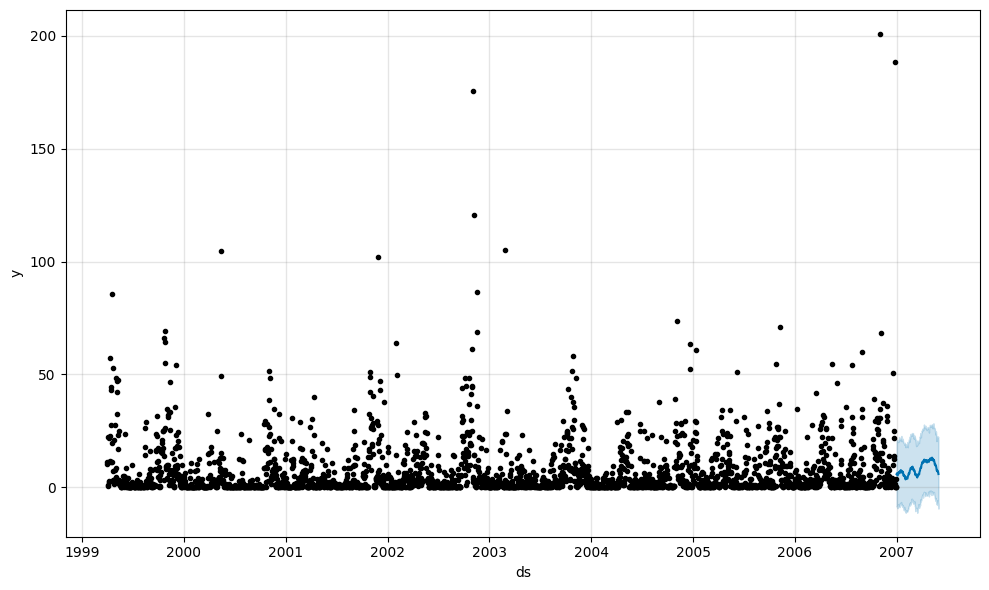

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/zp48fys9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/xv6ngc5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82088', 'data', 'file=/tmp/tmpk3w1z7yt/zp48fys9.json', 'init=/tmp/tmpk3w1z7yt/xv6ngc5b.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelxmnvccj9/prophet_model-20250403061900.csv', 'method=optimize', 'algori

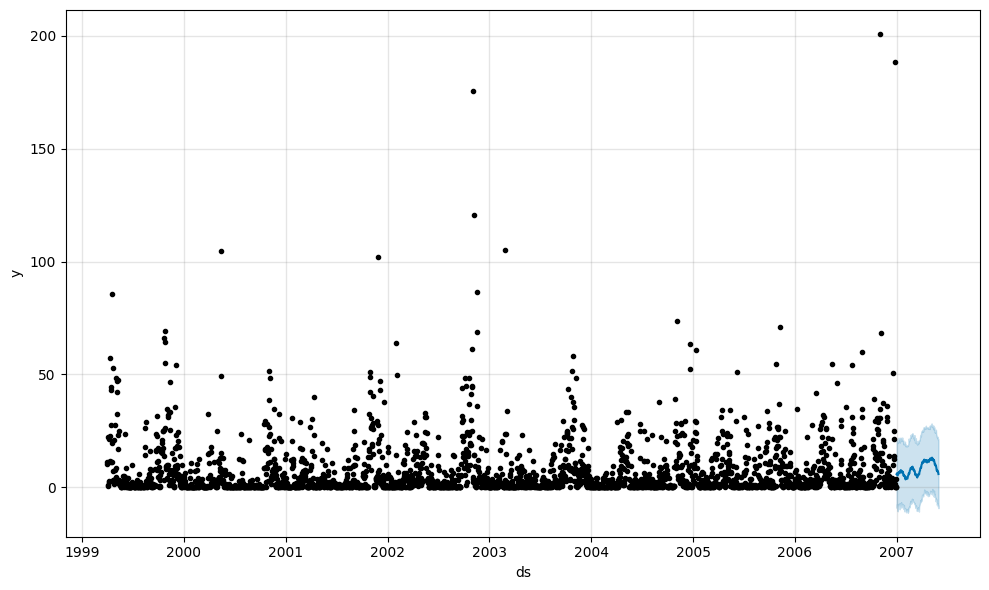

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/js0ps5_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/q8h79y85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73738', 'data', 'file=/tmp/tmpk3w1z7yt/js0ps5_z.json', 'init=/tmp/tmpk3w1z7yt/q8h79y85.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelkov1biwe/prophet_model-20250403061901.csv', 'method=optimize', 'algori

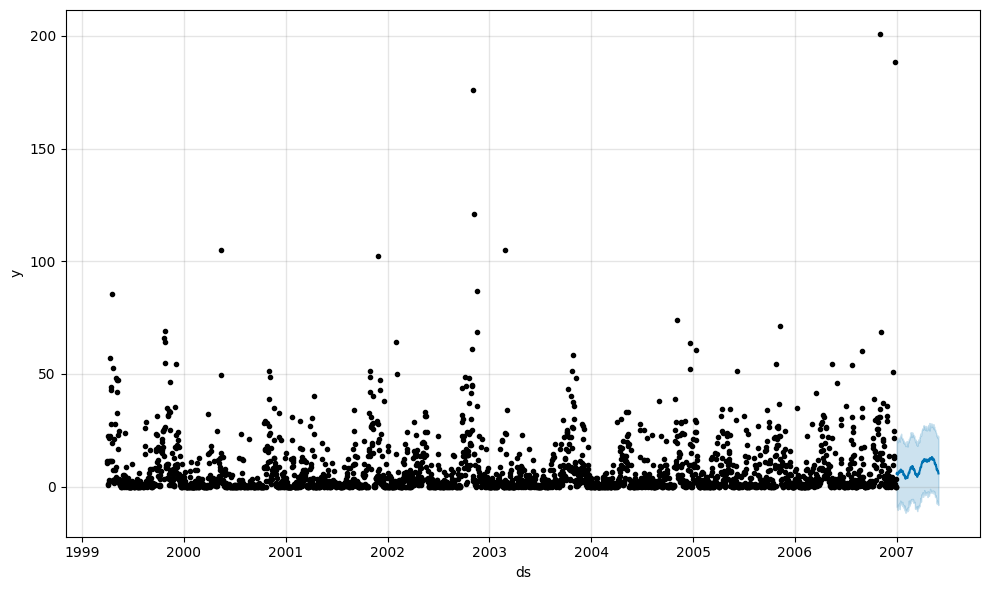

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/nrm57k_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/76kx9hk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58883', 'data', 'file=/tmp/tmpk3w1z7yt/nrm57k_9.json', 'init=/tmp/tmpk3w1z7yt/76kx9hk4.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelcijxp9pw/prophet_model-20250403061902.csv', 'method=optimize', 'algori

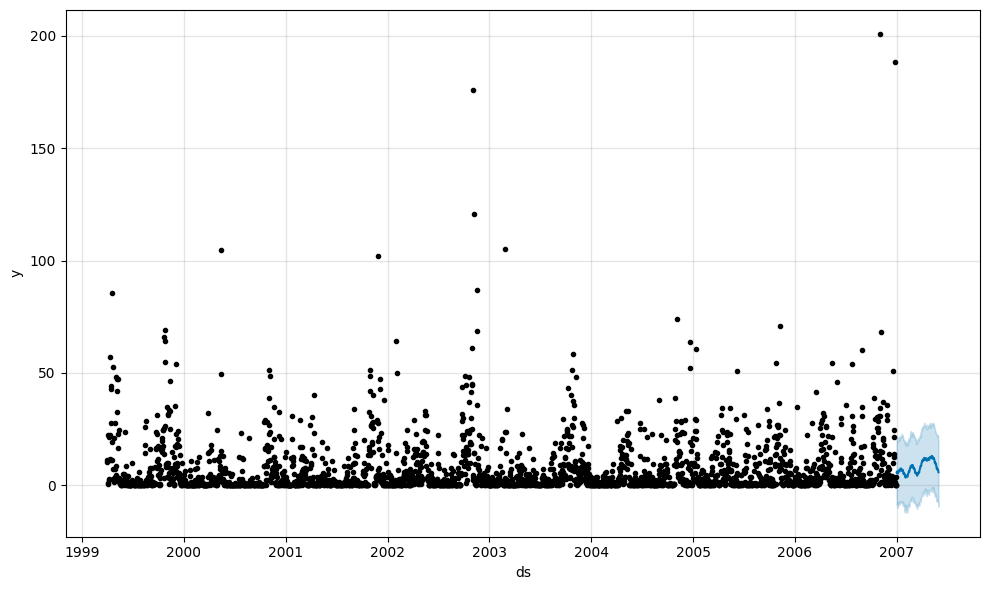

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/6tzpvtgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/28k3cxhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30630', 'data', 'file=/tmp/tmpk3w1z7yt/6tzpvtgr.json', 'init=/tmp/tmpk3w1z7yt/28k3cxhk.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelj2dpisgx/prophet_model-20250403061903.csv', 'method=optimize', 'algori

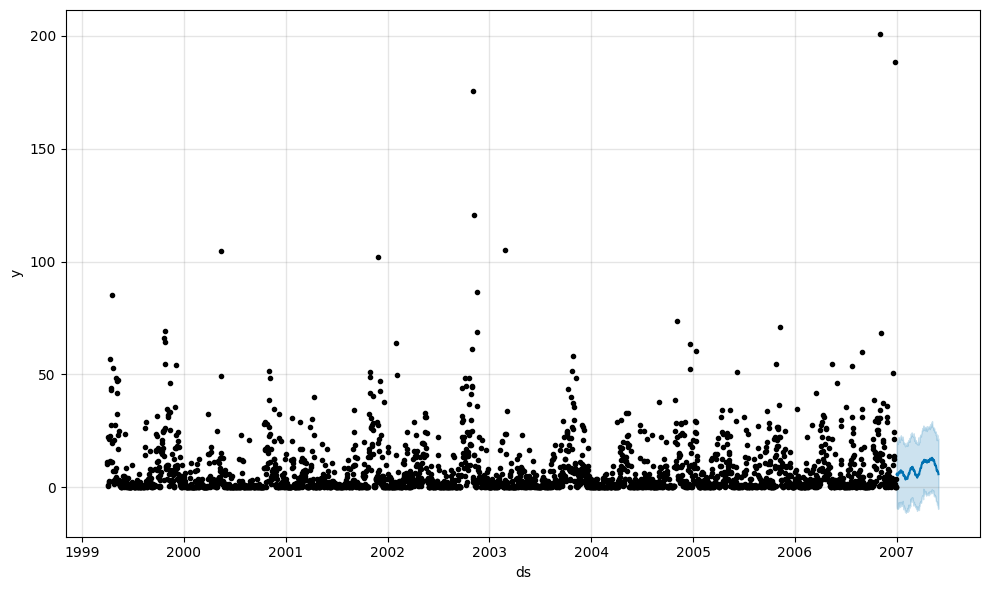

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/ektcckpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/ufjpbi00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7566', 'data', 'file=/tmp/tmpk3w1z7yt/ektcckpa.json', 'init=/tmp/tmpk3w1z7yt/ufjpbi00.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelxn6oc2ex/prophet_model-20250403061905.csv', 'method=optimize', 'algorit

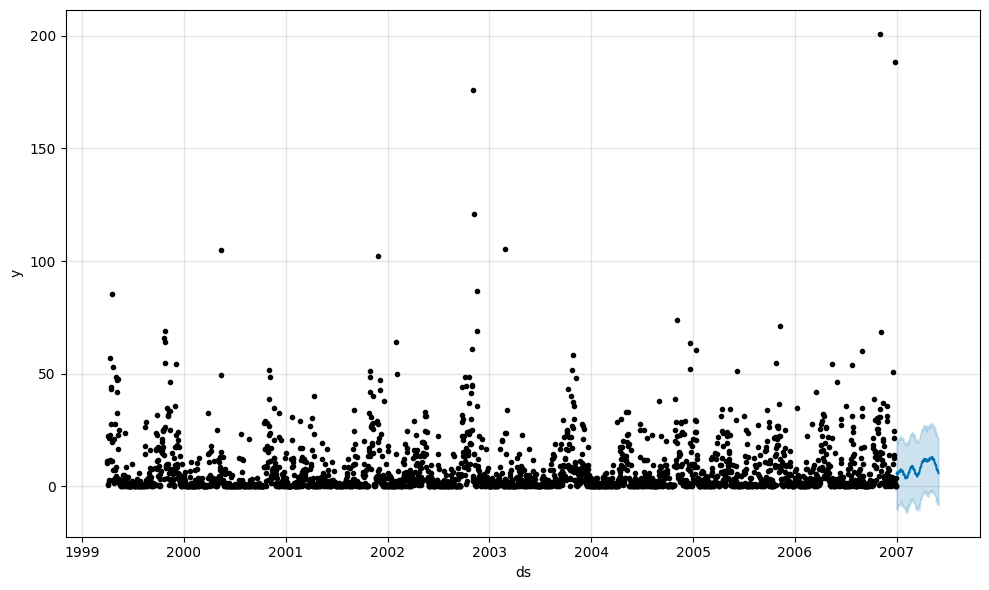

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/3pbdp948.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/nv_36w3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18955', 'data', 'file=/tmp/tmpk3w1z7yt/3pbdp948.json', 'init=/tmp/tmpk3w1z7yt/nv_36w3m.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelp1gwboix/prophet_model-20250403061907.csv', 'method=optimize', 'algori

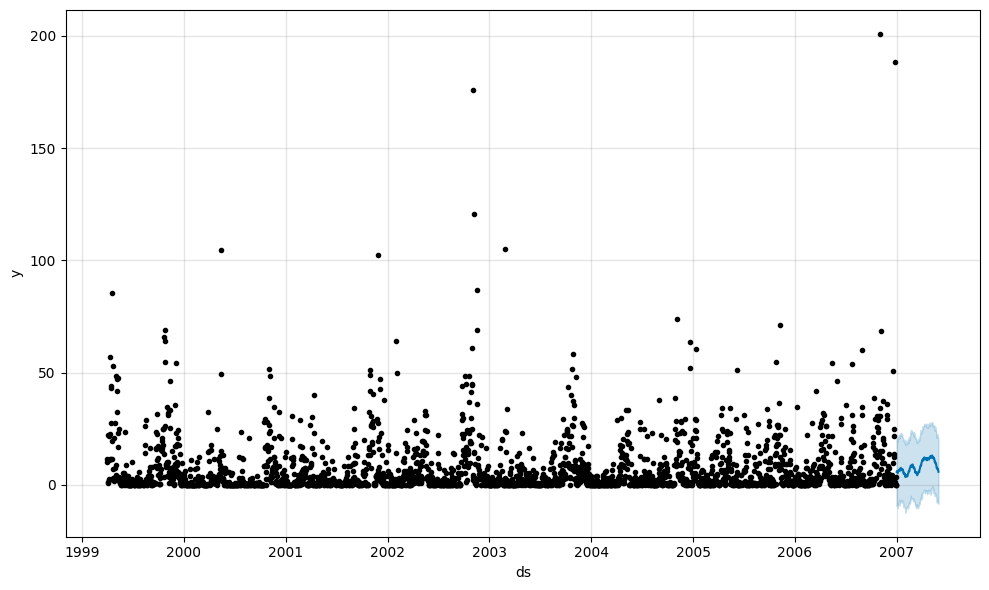

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/wfn005jk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/fm8qdqfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67221', 'data', 'file=/tmp/tmpk3w1z7yt/wfn005jk.json', 'init=/tmp/tmpk3w1z7yt/fm8qdqfd.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modeltx0l1k59/prophet_model-20250403061907.csv', 'method=optimize', 'algori

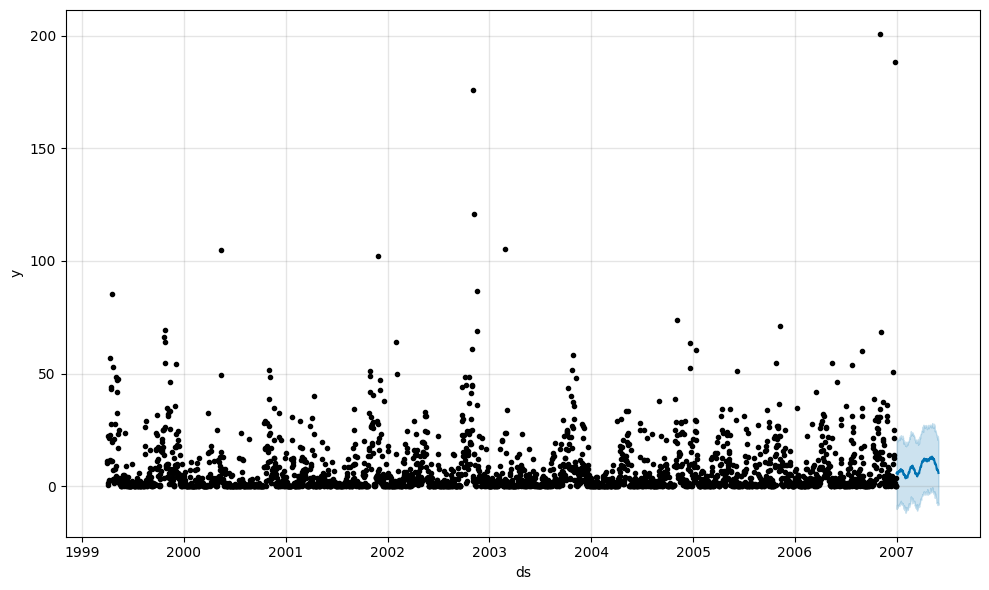

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/nnq65gq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/v_6bm_pv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20031', 'data', 'file=/tmp/tmpk3w1z7yt/nnq65gq9.json', 'init=/tmp/tmpk3w1z7yt/v_6bm_pv.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelxe3zxe52/prophet_model-20250403061908.csv', 'method=optimize', 'algori

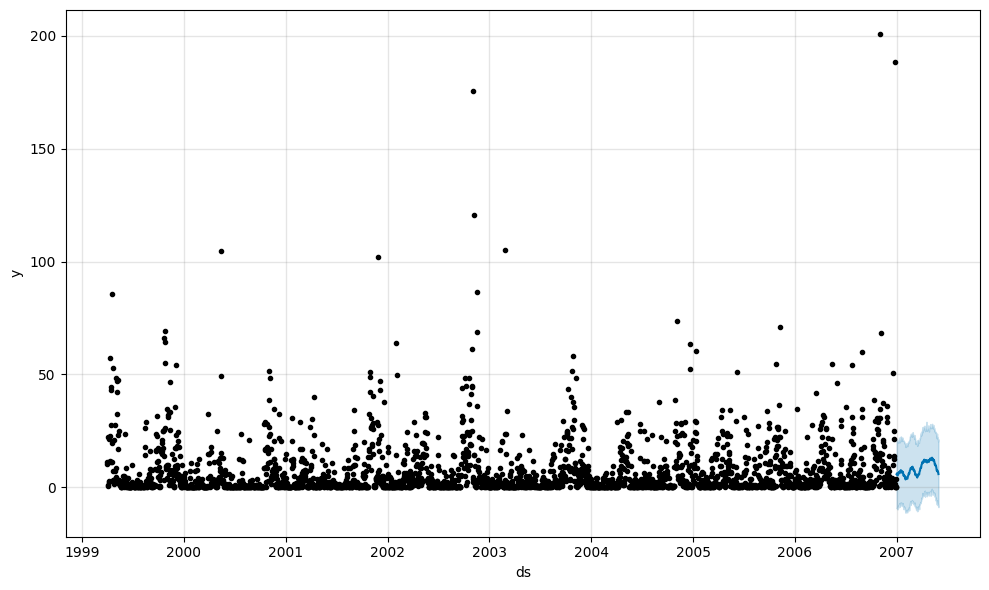

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/b5pvwskc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/z7_j4jcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74024', 'data', 'file=/tmp/tmpk3w1z7yt/b5pvwskc.json', 'init=/tmp/tmpk3w1z7yt/z7_j4jcd.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelxvn88v6n/prophet_model-20250403061909.csv', 'method=optimize', 'algori

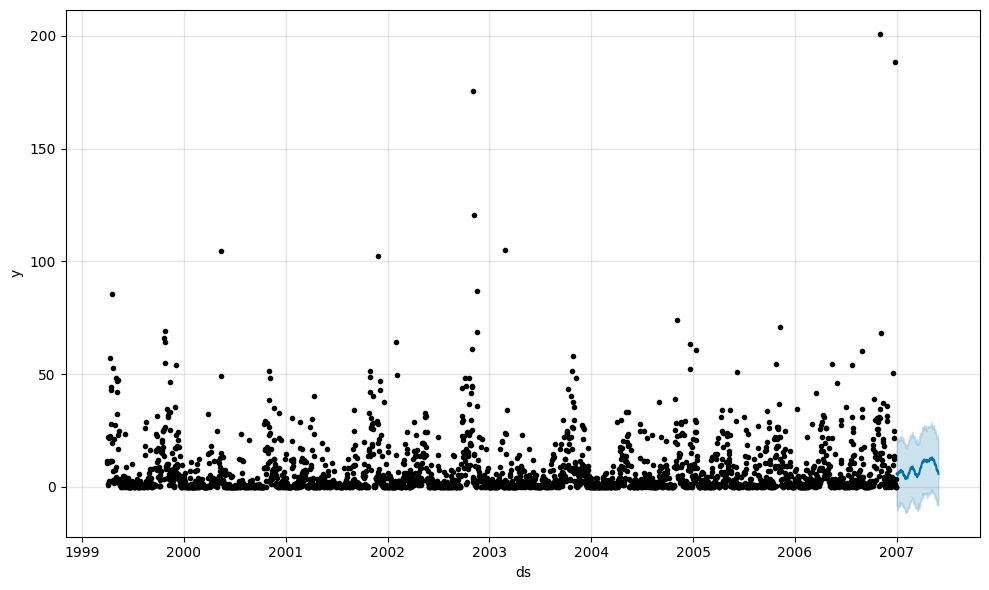

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/5cs_nn1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/yy4c8q0d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33746', 'data', 'file=/tmp/tmpk3w1z7yt/5cs_nn1k.json', 'init=/tmp/tmpk3w1z7yt/yy4c8q0d.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_model2bv289on/prophet_model-20250403061910.csv', 'method=optimize', 'algori

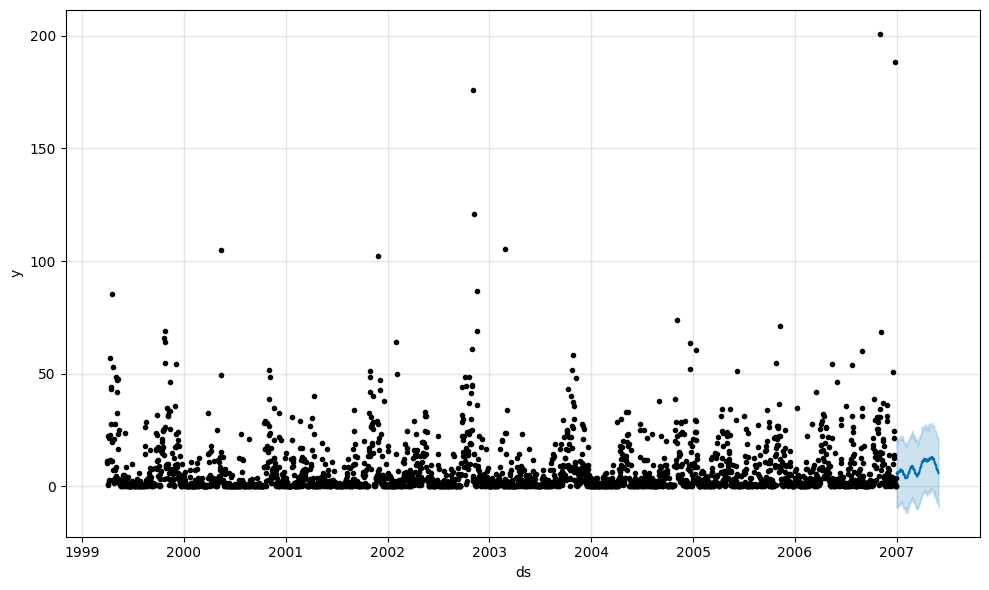

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/q1epx96v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/jos69k9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76607', 'data', 'file=/tmp/tmpk3w1z7yt/q1epx96v.json', 'init=/tmp/tmpk3w1z7yt/jos69k9h.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelcs4lzhic/prophet_model-20250403061911.csv', 'method=optimize', 'algori

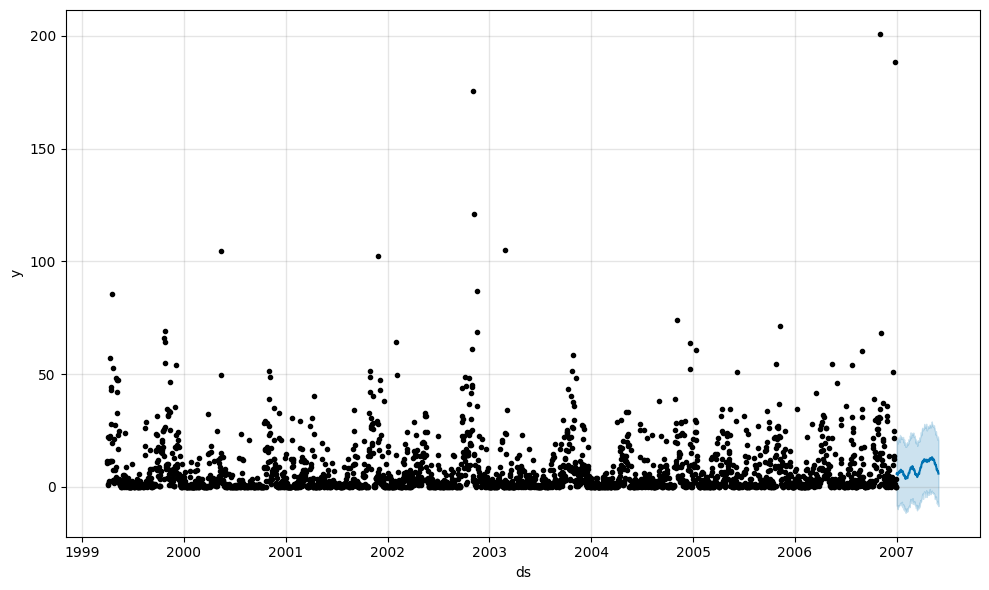

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/w5bstg_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/9jg0kjxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61029', 'data', 'file=/tmp/tmpk3w1z7yt/w5bstg_m.json', 'init=/tmp/tmpk3w1z7yt/9jg0kjxg.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelvpw9lly_/prophet_model-20250403061911.csv', 'method=optimize', 'algori

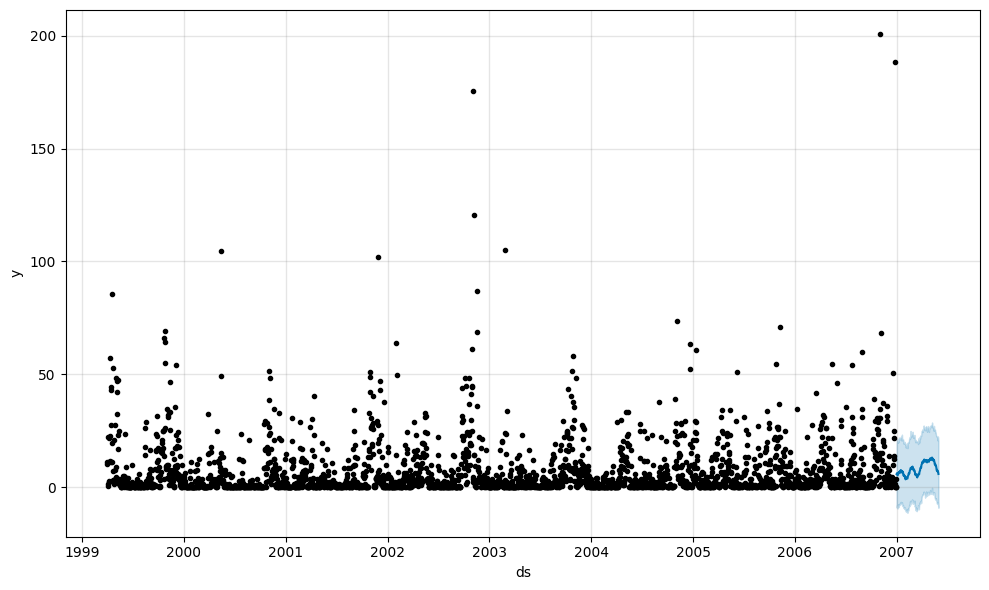

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/ggige4hs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/oictue4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66525', 'data', 'file=/tmp/tmpk3w1z7yt/ggige4hs.json', 'init=/tmp/tmpk3w1z7yt/oictue4n.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_model2s39wnax/prophet_model-20250403061912.csv', 'method=optimize', 'algori

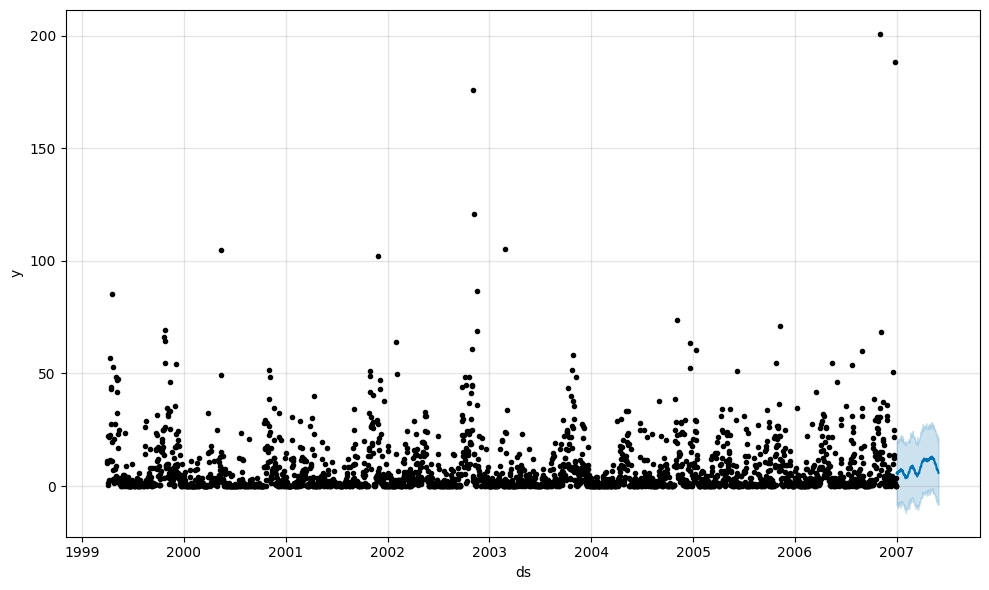

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/4gx5nwe6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/ni3dtg70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55014', 'data', 'file=/tmp/tmpk3w1z7yt/4gx5nwe6.json', 'init=/tmp/tmpk3w1z7yt/ni3dtg70.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelrzn5fvil/prophet_model-20250403061913.csv', 'method=optimize', 'algori

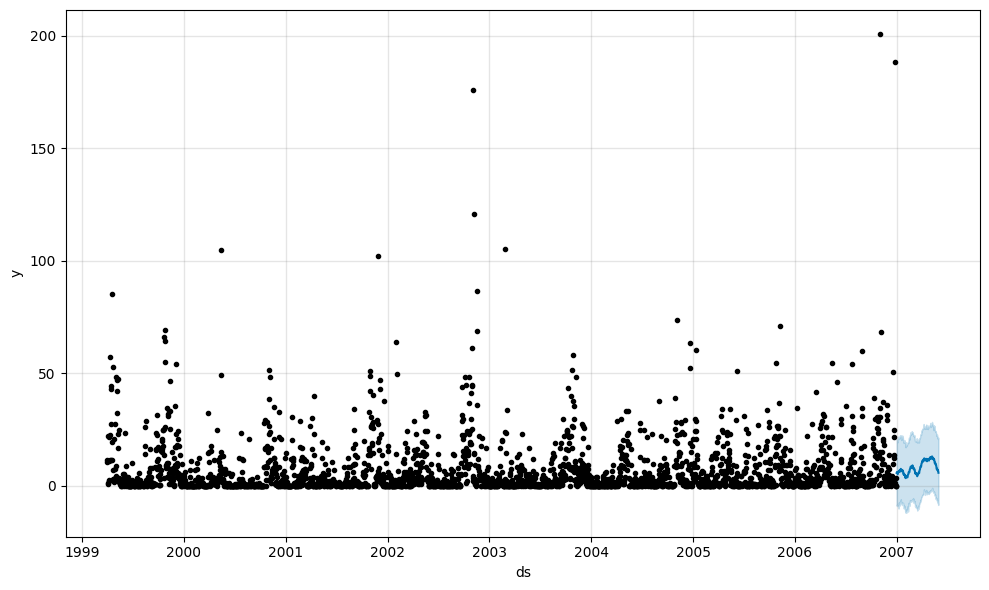

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/euqk2cyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/t49p13k4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60571', 'data', 'file=/tmp/tmpk3w1z7yt/euqk2cyl.json', 'init=/tmp/tmpk3w1z7yt/t49p13k4.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelgt412bg5/prophet_model-20250403061914.csv', 'method=optimize', 'algori

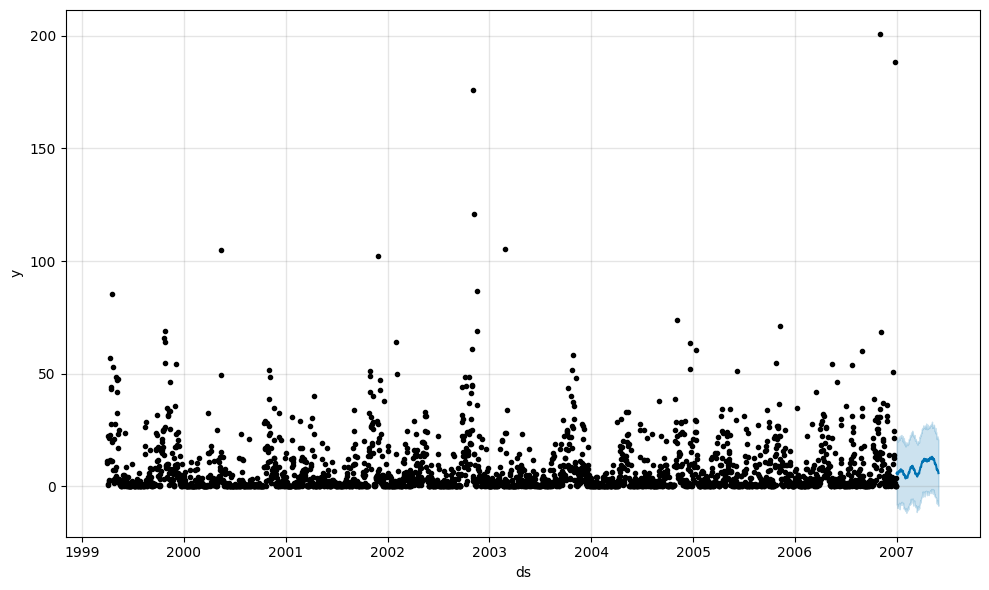

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/8a_afq6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/azkin9rd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48878', 'data', 'file=/tmp/tmpk3w1z7yt/8a_afq6j.json', 'init=/tmp/tmpk3w1z7yt/azkin9rd.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_model7d39kju1/prophet_model-20250403061915.csv', 'method=optimize', 'algori

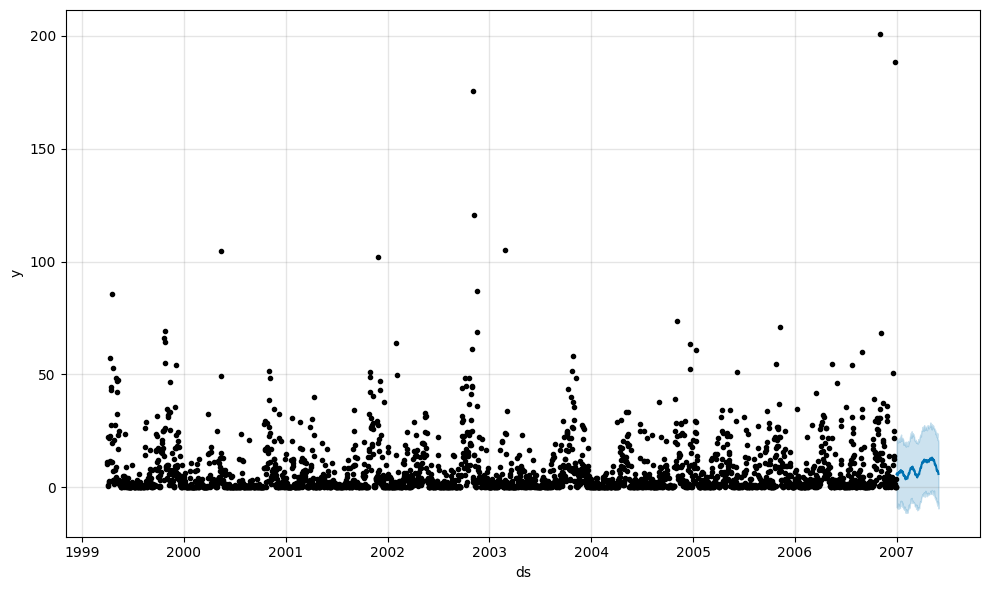

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/kk5ynj0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/i3nyetkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48328', 'data', 'file=/tmp/tmpk3w1z7yt/kk5ynj0q.json', 'init=/tmp/tmpk3w1z7yt/i3nyetkm.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modeli3xit1_w/prophet_model-20250403061916.csv', 'method=optimize', 'algori

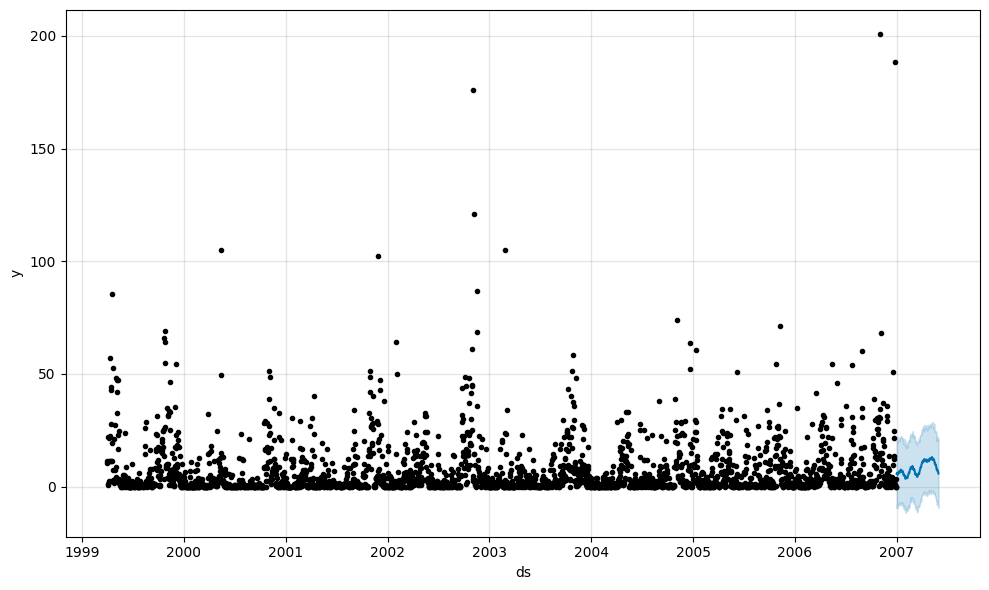

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/gh6dnzee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/xgppt1ea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64086', 'data', 'file=/tmp/tmpk3w1z7yt/gh6dnzee.json', 'init=/tmp/tmpk3w1z7yt/xgppt1ea.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelsi36kjor/prophet_model-20250403061917.csv', 'method=optimize', 'algori

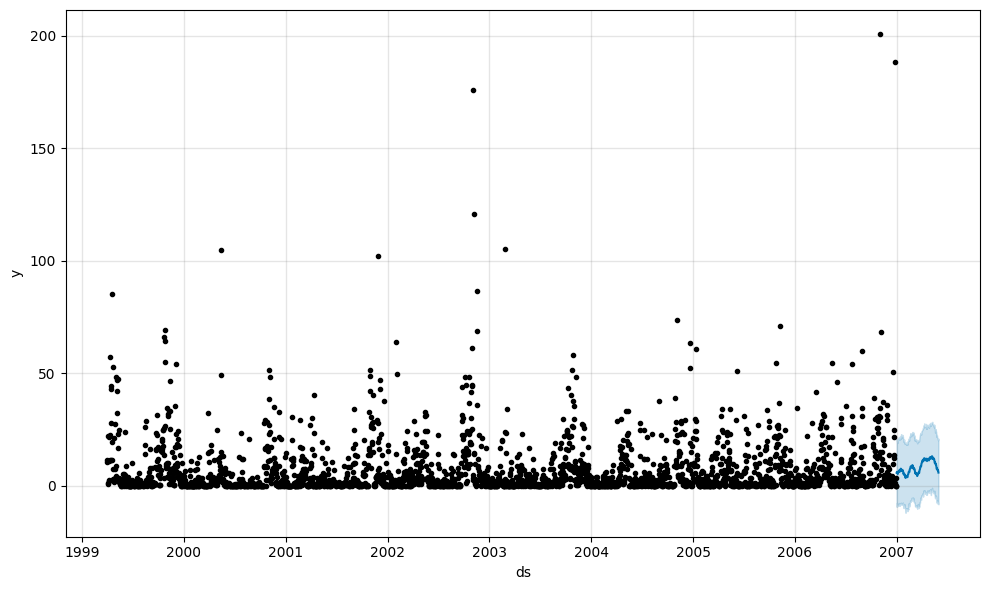

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/__juuukq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/hio83pao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60347', 'data', 'file=/tmp/tmpk3w1z7yt/__juuukq.json', 'init=/tmp/tmpk3w1z7yt/hio83pao.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelcu9qgpe5/prophet_model-20250403061918.csv', 'method=optimize', 'algori

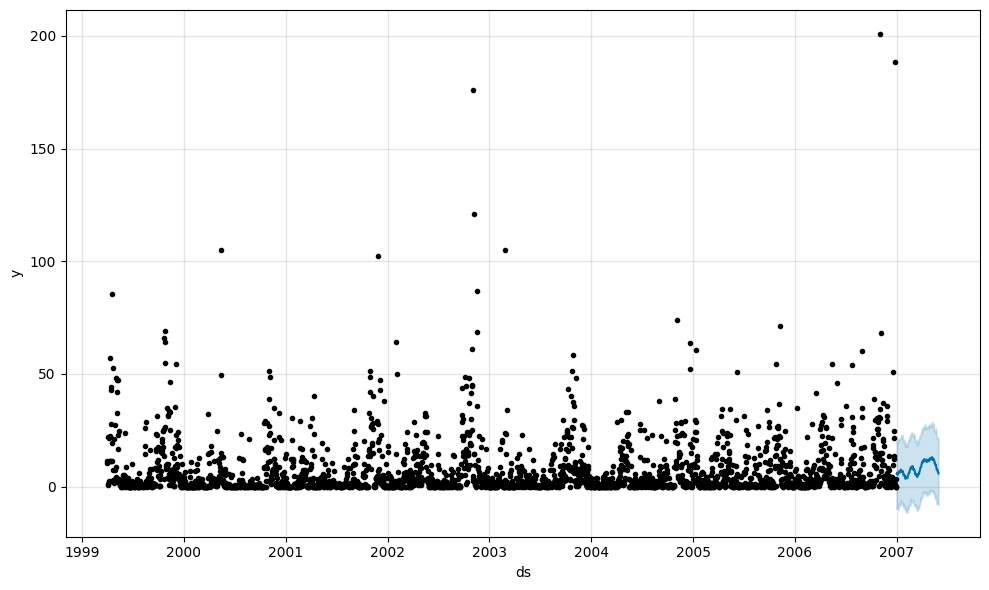

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/7g8e6kr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/parta04r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44043', 'data', 'file=/tmp/tmpk3w1z7yt/7g8e6kr9.json', 'init=/tmp/tmpk3w1z7yt/parta04r.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelo63wo6ds/prophet_model-20250403061920.csv', 'method=optimize', 'algori

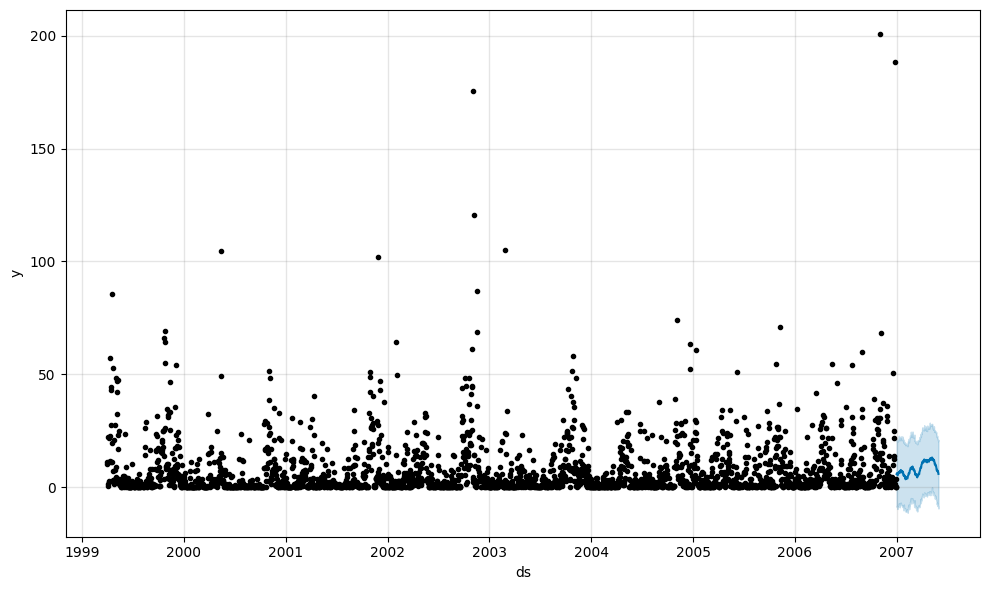

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/d1fjt4zg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/9188vc6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54128', 'data', 'file=/tmp/tmpk3w1z7yt/d1fjt4zg.json', 'init=/tmp/tmpk3w1z7yt/9188vc6g.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_model5i1b2zrz/prophet_model-20250403061920.csv', 'method=optimize', 'algori

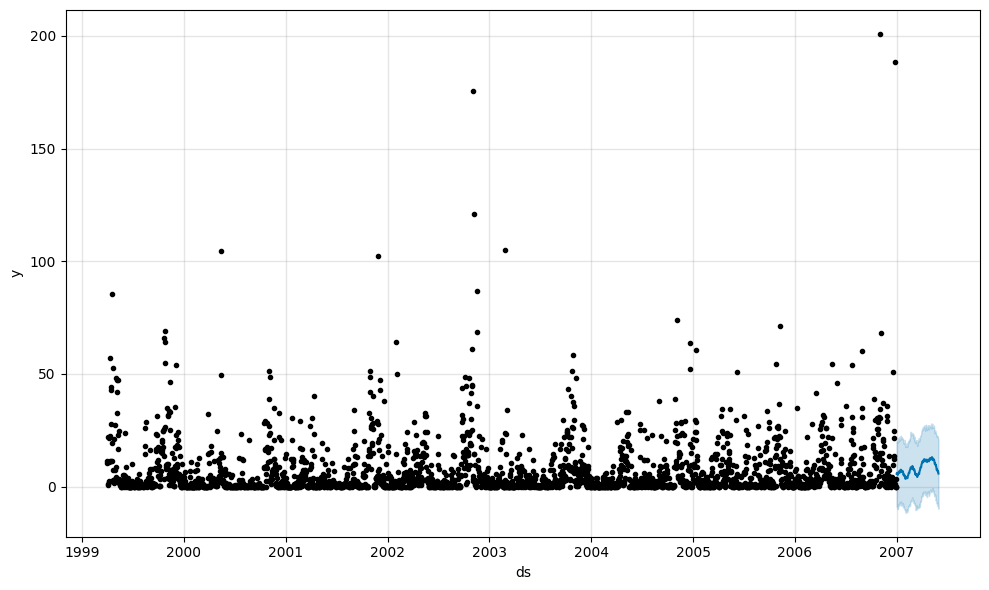

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/cevsd7u3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/kfrk8815.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65130', 'data', 'file=/tmp/tmpk3w1z7yt/cevsd7u3.json', 'init=/tmp/tmpk3w1z7yt/kfrk8815.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_model3fzjev9n/prophet_model-20250403061922.csv', 'method=optimize', 'algori

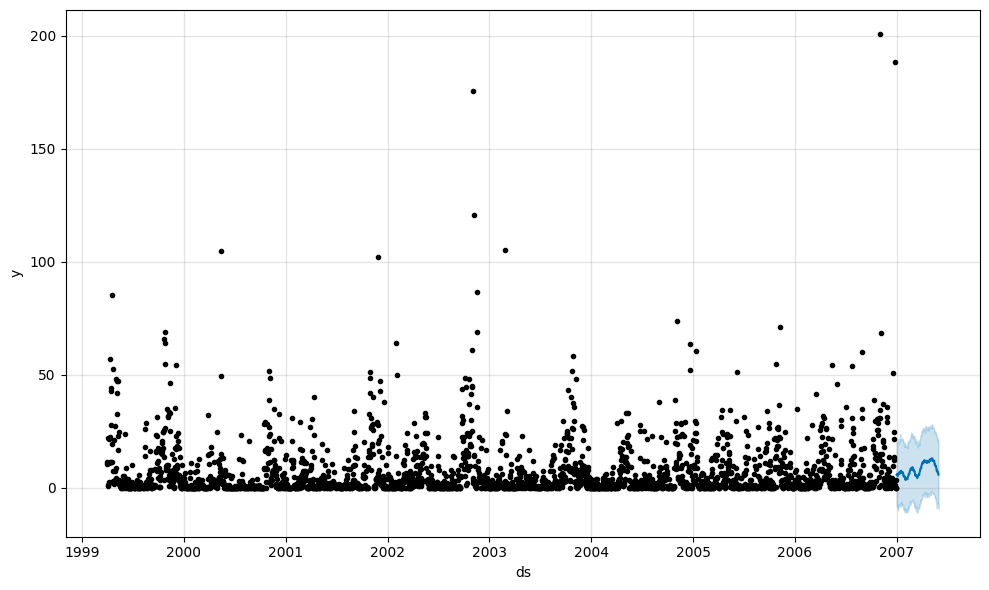

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/4fv1hf69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/cz6qm47u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13427', 'data', 'file=/tmp/tmpk3w1z7yt/4fv1hf69.json', 'init=/tmp/tmpk3w1z7yt/cz6qm47u.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelazyq_tay/prophet_model-20250403061922.csv', 'method=optimize', 'algori

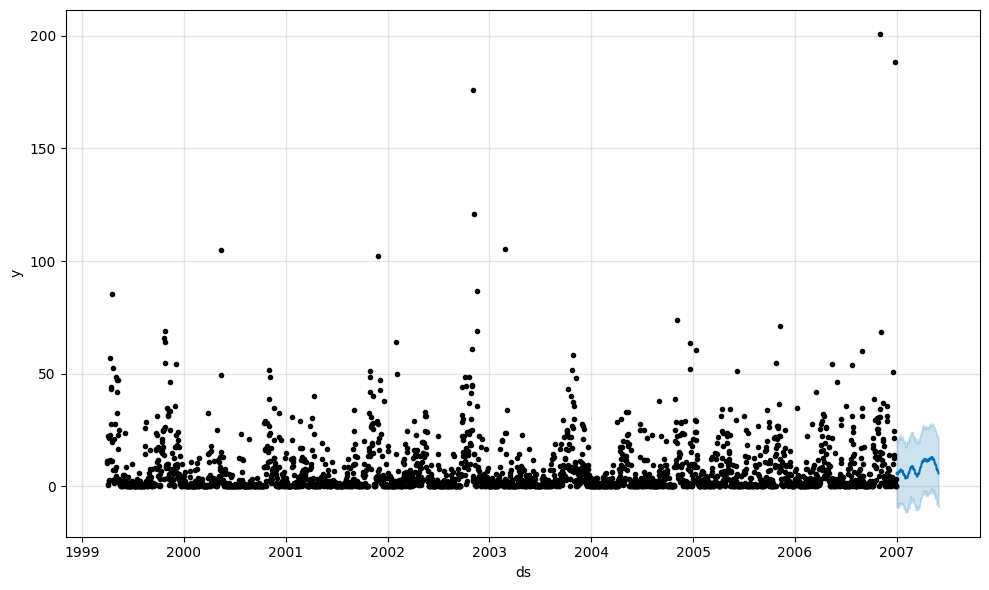

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/9llz89ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/lpd6rj1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16668', 'data', 'file=/tmp/tmpk3w1z7yt/9llz89ed.json', 'init=/tmp/tmpk3w1z7yt/lpd6rj1q.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelg5wplwtl/prophet_model-20250403061923.csv', 'method=optimize', 'algori

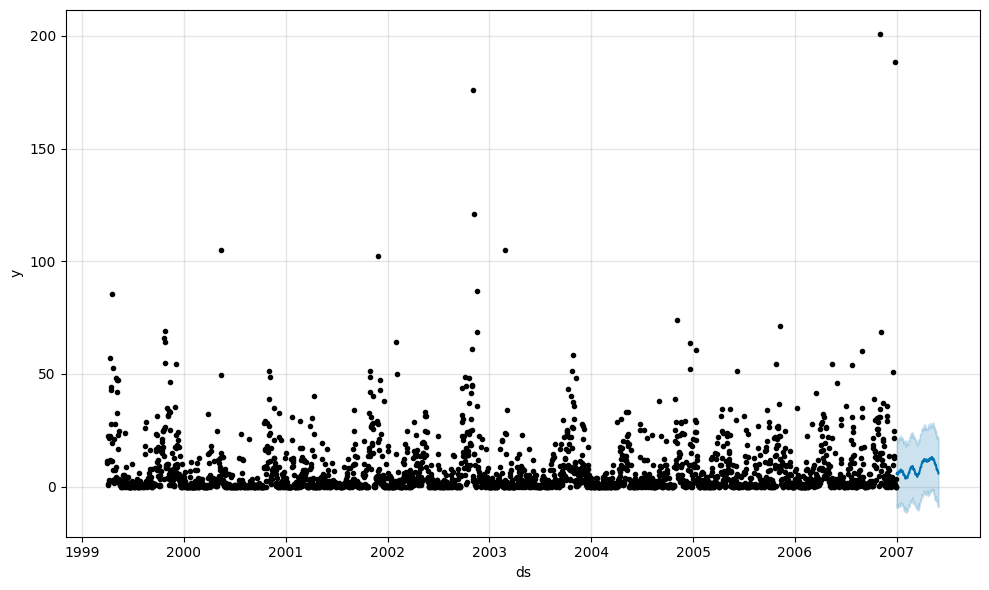

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/e3boug9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/xaiuxk6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85365', 'data', 'file=/tmp/tmpk3w1z7yt/e3boug9j.json', 'init=/tmp/tmpk3w1z7yt/xaiuxk6e.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modellrbtpzn_/prophet_model-20250403061924.csv', 'method=optimize', 'algori

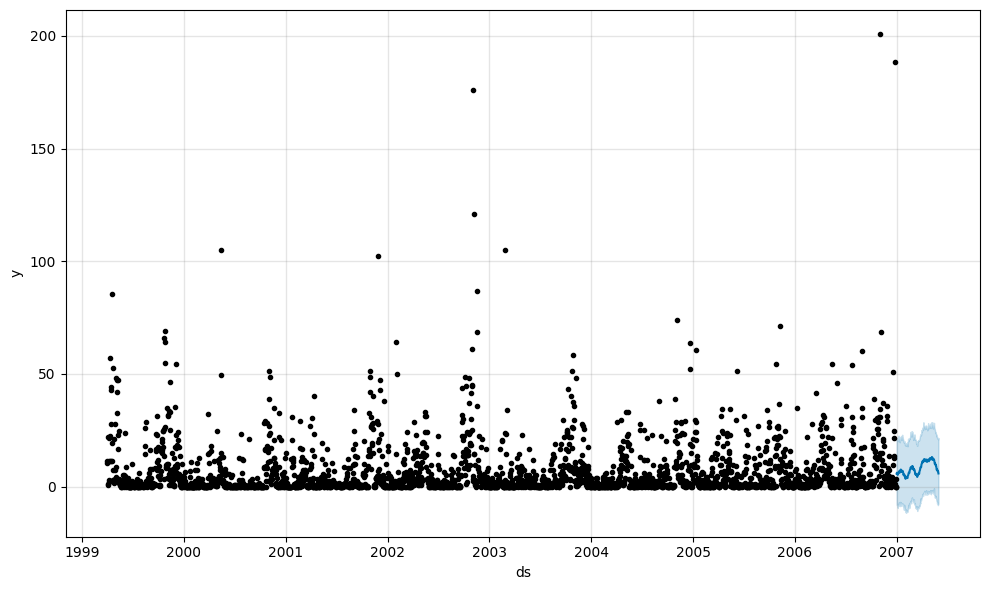

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/x6z28ty3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/313b_lkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60211', 'data', 'file=/tmp/tmpk3w1z7yt/x6z28ty3.json', 'init=/tmp/tmpk3w1z7yt/313b_lkx.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelbi2hu3lc/prophet_model-20250403061925.csv', 'method=optimize', 'algori

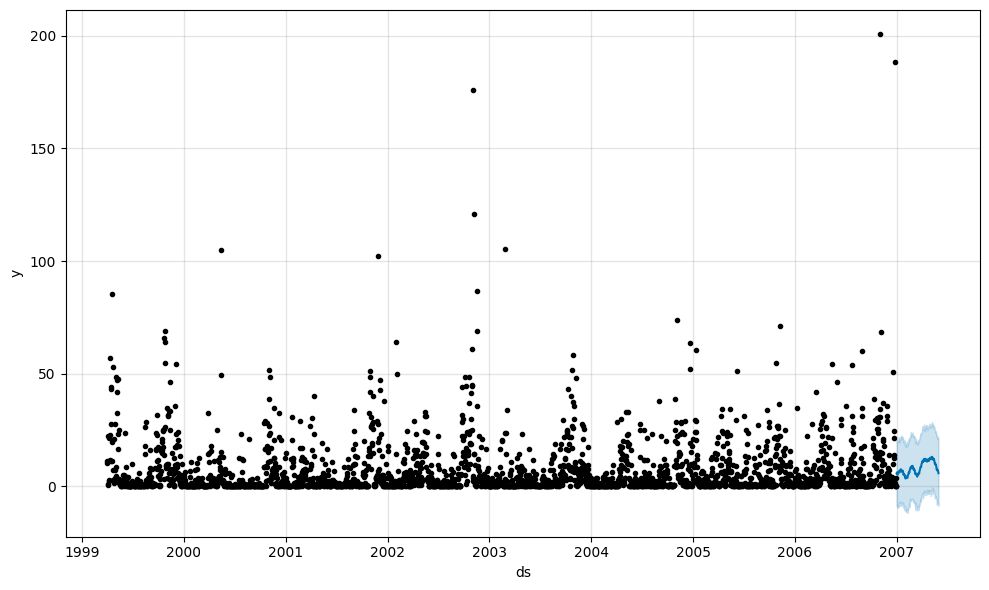

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/bsnz8906.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3w1z7yt/__nqzt6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99802', 'data', 'file=/tmp/tmpk3w1z7yt/bsnz8906.json', 'init=/tmp/tmpk3w1z7yt/__nqzt6l.json', 'output', 'file=/tmp/tmpk3w1z7yt/prophet_modelgsylh0zz/prophet_model-20250403061926.csv', 'method=optimize', 'algori

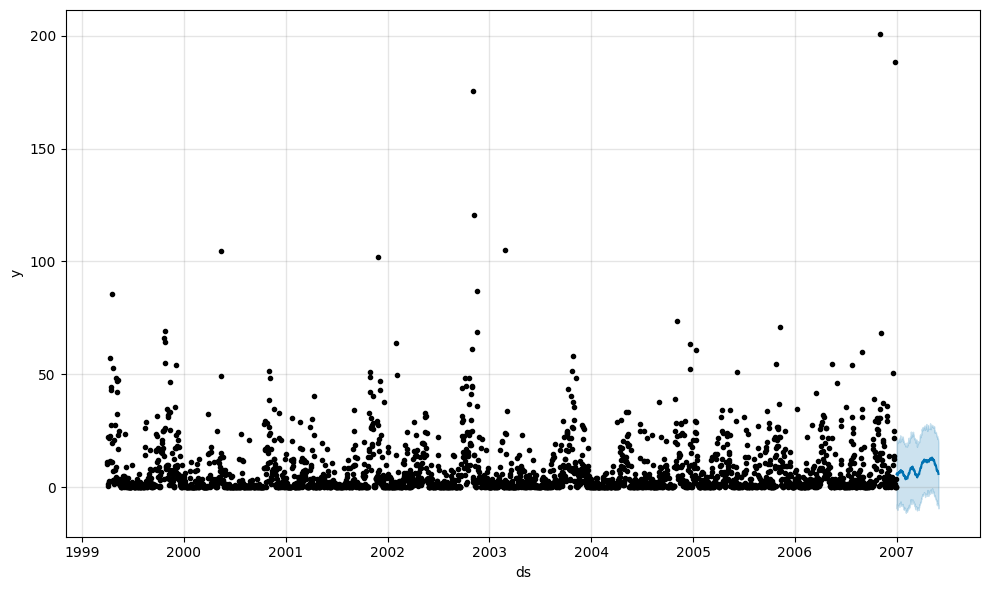

<ipython-input-20-af0cbcbd470f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kingdom_forecast['Kingdom'] = kingdom


In [ ]:
from prophet import Prophet

# Convert Date Column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

# Initialize empty dataframe to store final predictions
final_predictions = pd.DataFrame(columns=['Date', 'Kingdom', 'Rainfall'])

for kingdom in kingdom_list:
  # Create a new DataFrame with the specified criteria
  new_df = data[(data['kingdom'] == x)][['Date', 'Rain_Amount']]

  # Display the new DataFrame
  new_df = new_df.rename(columns={'Rain_Amount': 'y', 'Date': 'ds'})
  model = Prophet()
  model.fit(new_df)

  # Create future dataframe
  future = pd.date_range(start='2007-01-01', end='2007-05-31', freq='D').to_frame(index=False, name='ds')
  forecast = model.predict(future)

  # Plot forecast
  fig = model.plot(forecast)
  plt.show()

  # Extract relevant columns
  kingdom_forecast = forecast[['ds', 'yhat']]
  kingdom_forecast['Kingdom'] = kingdom
  kingdom_forecast = kingdom_forecast.rename(columns={'ds': 'Date', 'yhat': 'Rainfall'})

  # Append to final dataframe
  final_predictions = pd.concat([final_predictions, kingdom_forecast])


In [ ]:
# Find the maximum of Rain_Amount
max_rain_amount = data['Rain_Amount'].max()
print(f"The maximum value of Rain_Amount is: {max_rain_amount}")

The maximum value of Rain_Amount is: 440.44000000000005


<ipython-input-10-7cf7430f76b1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rainfall = data.groupby('Month')['Rain_Amount'].mean()


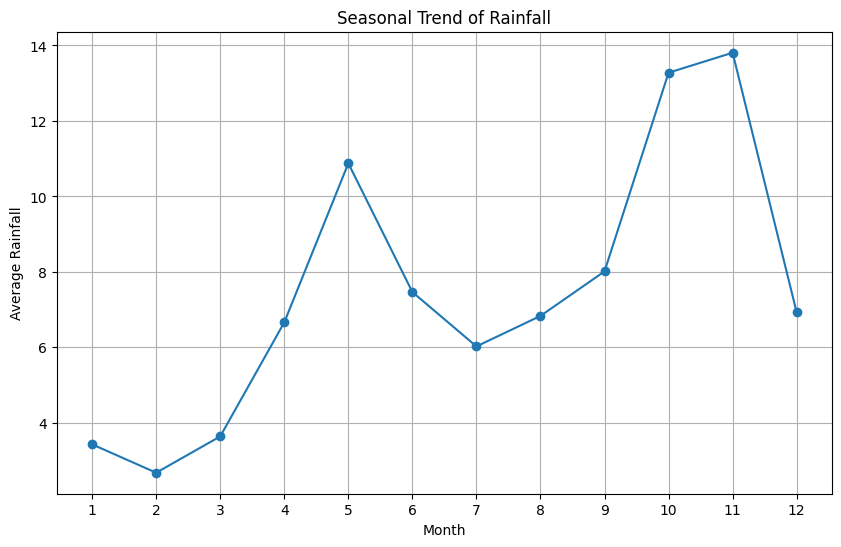

In [ ]:
# prompt: Find the seasonal trend for rainfall. There are three columns as Year, Month and Day

import matplotlib.pyplot as plt
# Convert 'Month' to categorical for better handling
data['Month'] = data['Month'].astype('category')

# Group data by month and calculate the mean rainfall
monthly_rainfall = data.groupby('Month')['Rain_Amount'].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Seasonal Trend of Rainfall')
plt.xticks(monthly_rainfall.index)  # Ensure all month labels are shown
plt.grid(True)
plt.show()


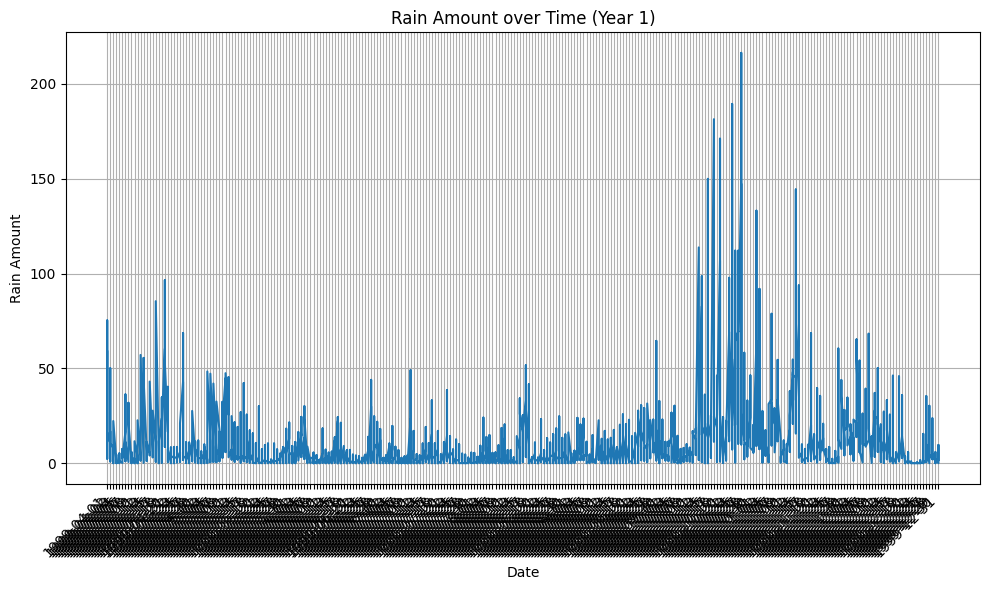

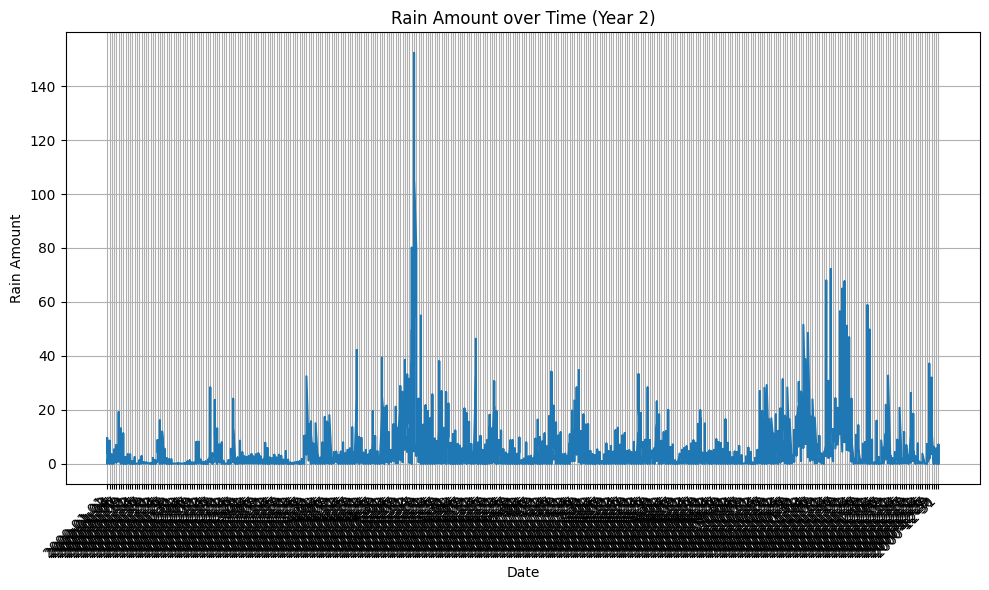

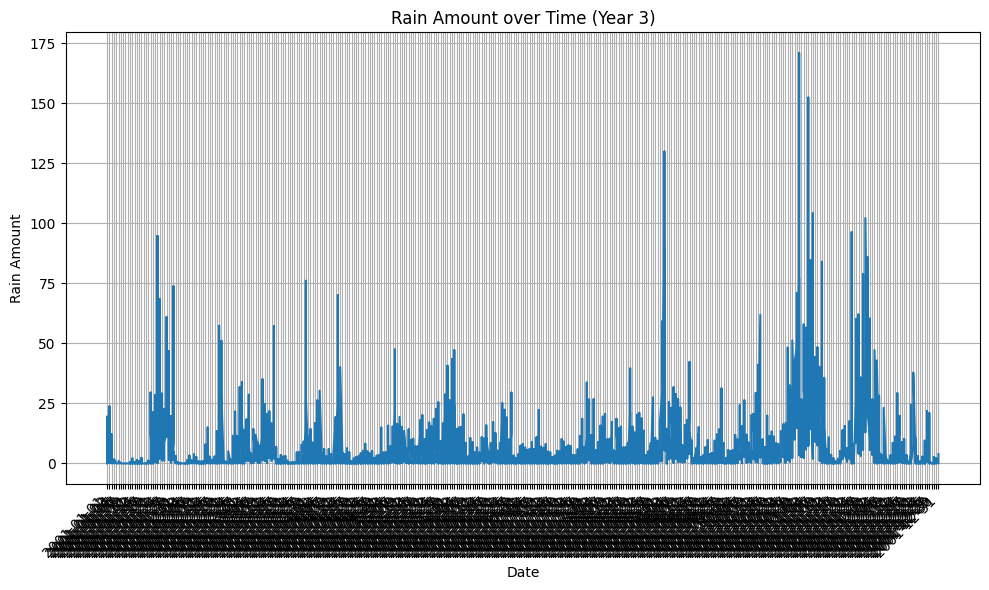

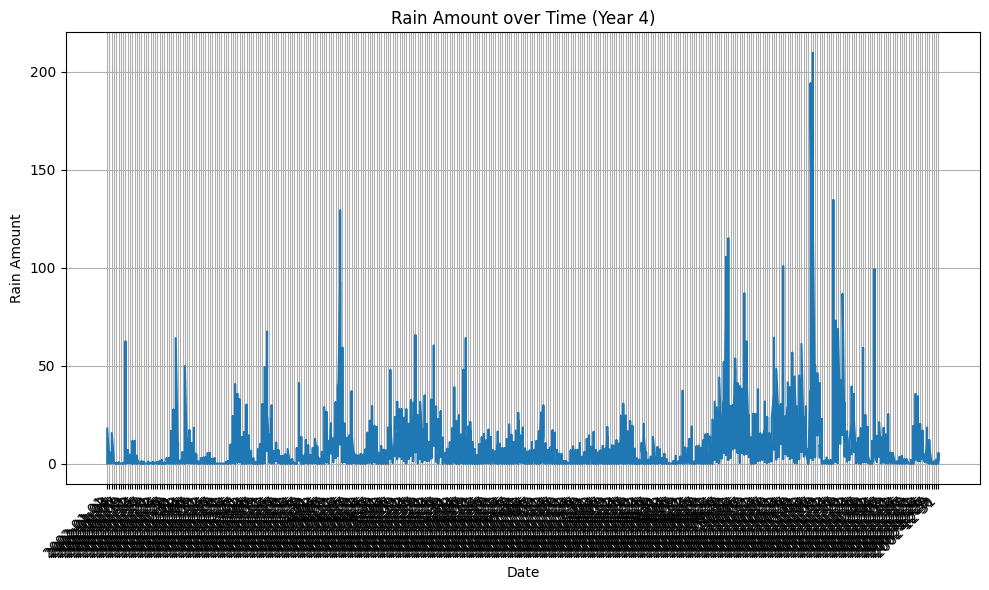

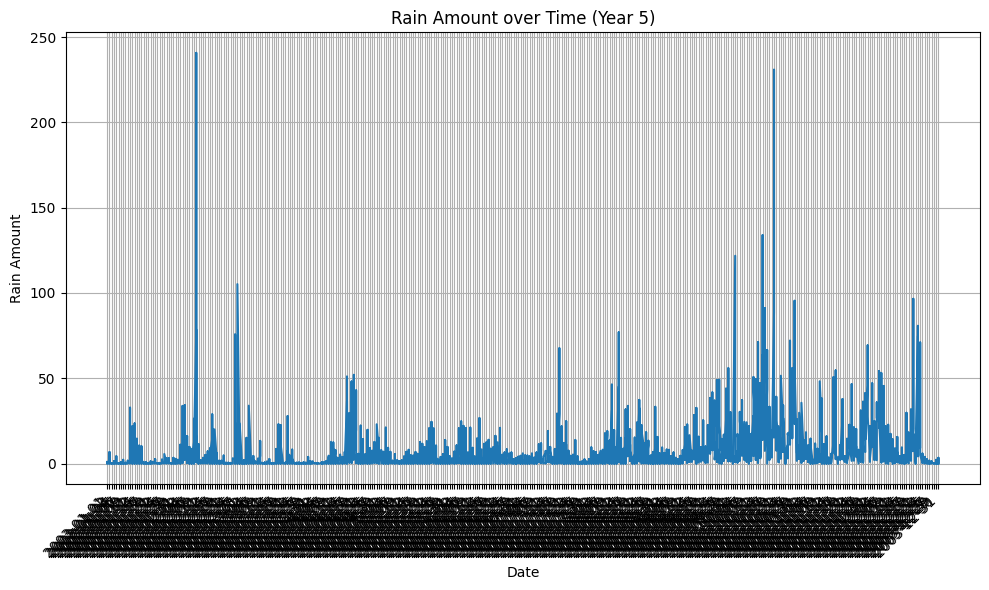

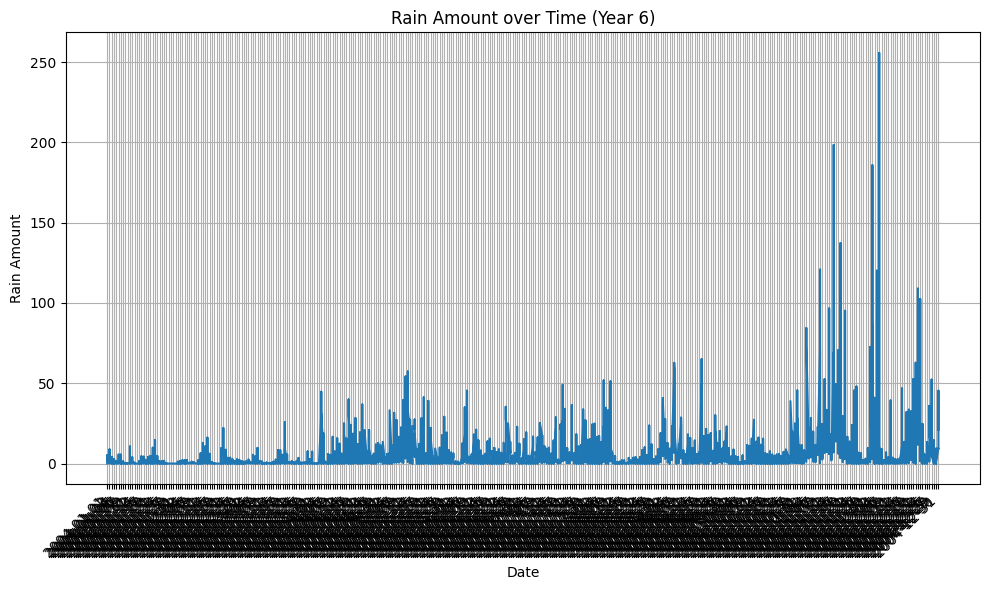

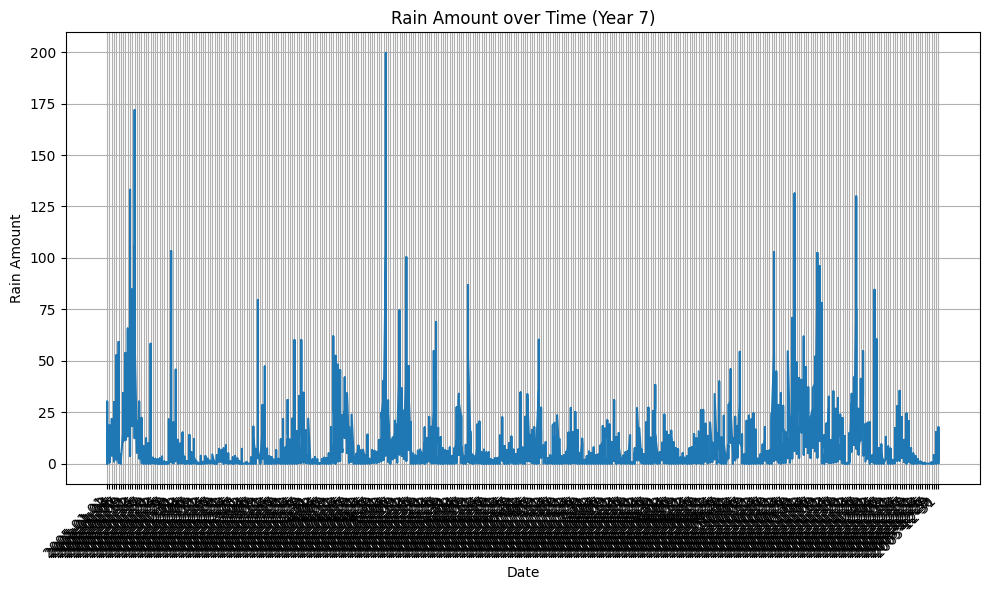

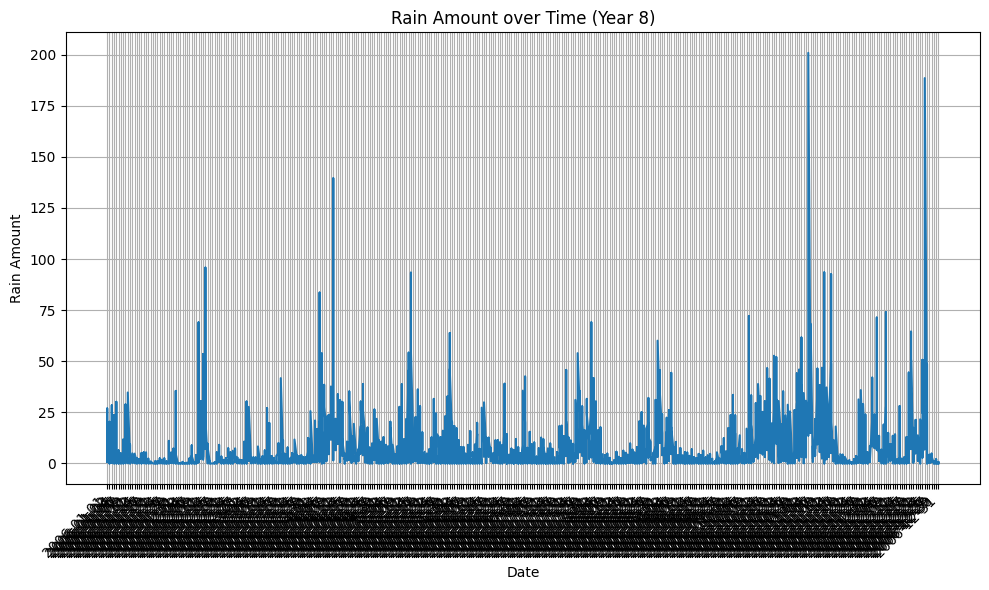

In [ ]:
for x in range(8):
    # Filter data for Year = 1
    data_year1 = data[data['Year'] == x+1]

    # Plot Rain_Amount for Year = 1
    plt.figure(figsize=(10, 6))
    plt.plot(data_year1['Date'], data_year1['Rain_Amount'])
    plt.xlabel('Date')
    plt.ylabel('Rain Amount')
    plt.title(f'Rain Amount over Time (Year {x+1})')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


In [ ]:
# Load dataset
test_data = pd.read_csv("/content/test.csv")

# Display basic info
print(test_data.info())
print(test_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       4530 non-null   int64 
 1   Year     4530 non-null   int64 
 2   Month    4530 non-null   int64 
 3   Day      4530 non-null   int64 
 4   kingdom  4530 non-null   object
dtypes: int64(4), object(1)
memory usage: 177.1+ KB
None
      ID  Year  Month  Day   kingdom
0  84961     9      1    1   Arcadia
1  84962     9      1    1  Atlantis
2  84963     9      1    1    Avalon
3  84964     9      1    1   Camelot
4  84965     9      1    1     Dorne


In [ ]:
# Add 'kin_lat' and 'kin_lon' columns filled with NaN values
test_data['kin_lat'] = np.nan
test_data['kin_lon'] = np.nan

In [ ]:
test_data.head()

,ID,Year,Month,Day,kingdom,kin_lat,kin_lon
0,84961,9,1,1,Arcadia,NaN,NaN
1,84962,9,1,1,Atlantis,NaN,NaN
2,84963,9,1,1,Avalon,NaN,NaN
3,84964,9,1,1,Camelot,NaN,NaN
4,84965,9,1,1,Dorne,NaN,NaN


In [ ]:
# Custom kingdom coordinates mapping (provided in the prompt)
KINGDOM_COORDS_MAPPING = {
    'Arcadia': (24.2800015, -37.22998),
    'Atlantis': (22.9799985, -37.32999),
    'Avalon': (22.88, -37.130006),
    'Camelot': (24.180003, -36.92999400000001),
    'Dorne': (25.780002, -37.53),
    'Eden': (23.7800015, -37.630006),
    'El Dorado': (23.680003, -37.22998),
    'Elysium': (23.7800015, -37.630006),
    'Emerald City': (23.4799985, -37.53),
    'Helios': (24.38, -37.130006),
    'Krypton': (23.7800015, -37.630006),
    'Metropolis': (23.88, -37.630006),
    'Midgar': (24.88, -37.72998),
    'Midgard': (24.4799985, -36.92999400000001),
    'Mordor': (23.0800046, -36.32999),
    'Neo-City': (23.680003, -37.630006),
    'Neo-Tokyo': (23.680003, -37.630006),
    'Nirvana': (22.88, -37.130006),
    'Olympus': (23.7800015, -37.53),
    'Pandora': (23.88, -37.630006),
    'Rapture': (23.9799985, -37.53),
    'Rivendell': (23.7800015, -36.92999400000001),
    'Serenity': (23.680003, -37.630006),
    'Shangri-La': (23.7800015, -37.630006),
    'Solara': (23.38, -37.53),
    'Solstice': (25.479998, -36.32999),
    'Sunspear': (26.580005, -37.53),
    'Utopia': (23.9799985, -37.630006),
    'Valyria': (24.2800015, -35.72998),
    'Winterfell': (23.9799985, -36.42999400000001)
}

# Iterate through the test data and update coordinates based on the kingdom
for index, row in test_data.iterrows():
    kingdom = row['kingdom']
    if kingdom in KINGDOM_COORDS_MAPPING:
        test_data.loc[index, 'kin_lat'], test_data.loc[index, 'kin_lon'] = KINGDOM_COORDS_MAPPING[kingdom]
    else:
        print("One Miss")


In [ ]:
test

,ID,Year,Month,Day,kingdom,kin_lat,kin_lon
0,84961,9,1,1,Arcadia,24.280002,-37.229980
1,84962,9,1,1,Atlantis,22.979999,-37.329990
2,84963,9,1,1,Avalon,22.880000,-37.130006
3,84964,9,1,1,Camelot,24.180003,-36.929994
4,84965,9,1,1,Dorne,25.780002,-37.530000
